# Exploratory Data Analysis (EDA) for Data Jobs

## Project Overview
This project focuses on performing an **Exploratory Data Analysis (EDA)** on a dataset of job postings related to data roles.

The aim is to understand the distribution of data-related jobs across different sectors, countries and companies.

## Visualizations
The following key visualizations were created as part of this analysis:

1. **Data Jobs per Title**: A bar chart visualizing the distribution of job titles in the dataset (e.g., Data Analyst, Data Scientist, etc.).
2. **Data Jobs per Country**: A bar chart showing the distribution of data-related job postings across different countries.
3. **Data Jobs per Company**: A bar chart showcasing the companies with the most job openings for data-related roles.
4. **Benefits Offered by Companies**: A chart illustrating the most common benefits offered by companies, including remote work options, health insurance, and whether a degree is required for the job.



In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Data
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

c:\Program Files\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Roles to Explore

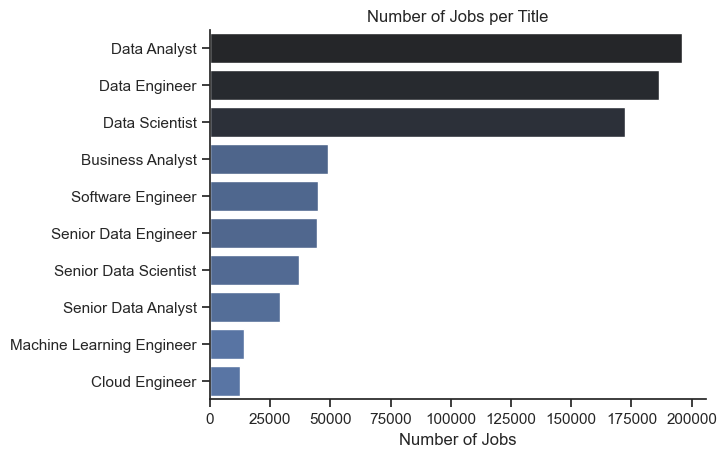

In [4]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', palette='dark:b_r', hue='count',  legend=False)
sns.despine()
plt.title('Number of Jobs per Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Countries to Explore

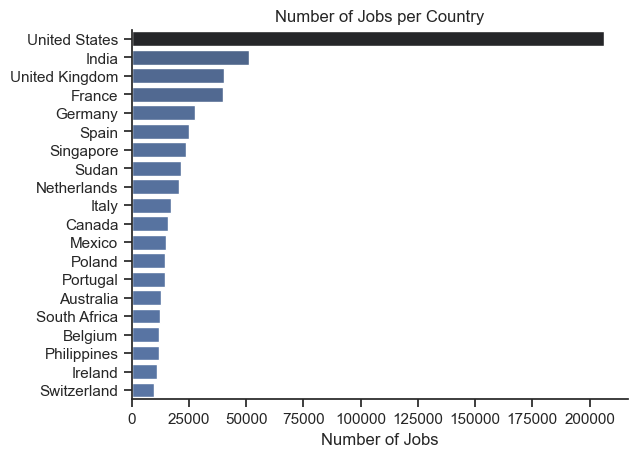

In [5]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', palette='dark:b_r', hue='count', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Companies to Explore

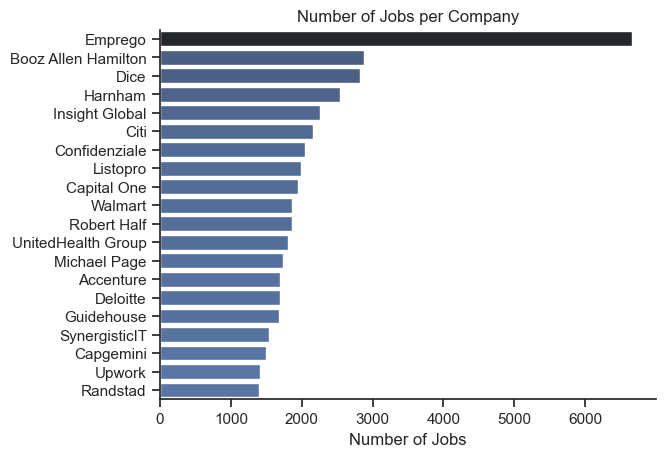

In [6]:
df_plot = df['company_name'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', palette='dark:b_r', hue='count', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Benefits

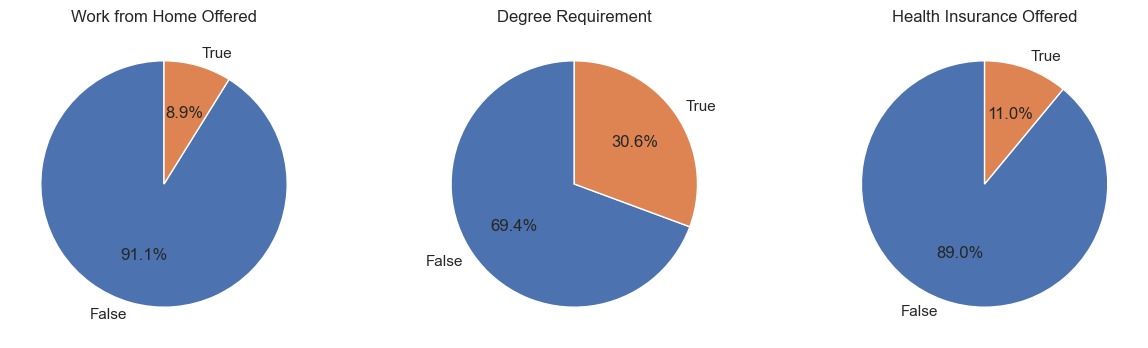

In [7]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(15,4))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()